In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tab-transformer-pytorch pandas numpy matplotlib seaborn plotly scikit-learn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [8]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/PROJECTS/LoanScopeAI/data/train.csv')

In [9]:
# Basic information about the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of samples: {df.shape[0]}")

Dataset Shape: (111107, 19)
Number of features: 19
Number of samples: 111107


In [12]:
# Info of samples
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [20]:
# Analysis of target variable
print("Unique values in Loan Status:")
print(df['Loan Status'].value_counts())

Unique values in Loan Status:
Loan Status
Loan Given      85934
Loan Refused    25173
Name: count, dtype: int64


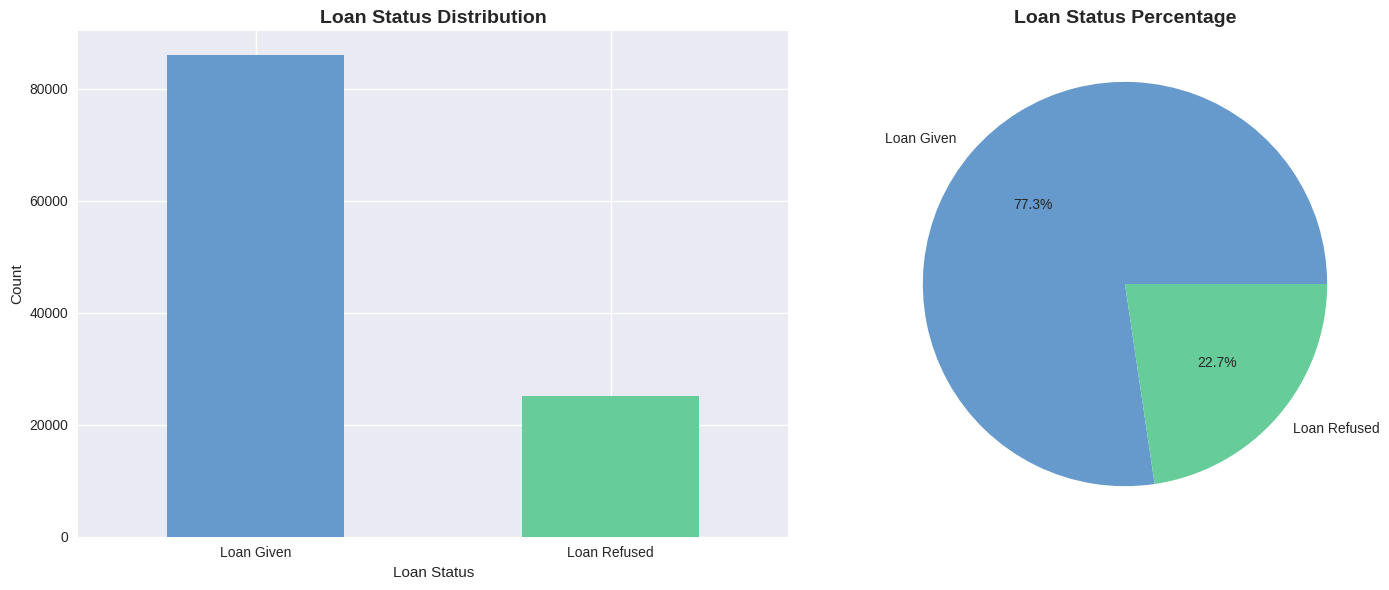

In [34]:
# Visualize target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Plot
df['Loan Status'].value_counts().plot(kind='bar', ax=ax1, color=['#6699cc', '#66cc99'])
ax1.set_title('Loan Status Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Loan Status')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=360)

# Pie chart
df['Loan Status'].value_counts().plot(kind='pie', ax=ax2, colors=['#6699cc', '#66cc99'], autopct='%1.1f%%')
ax2.set_title('Loan Status Percentage', fontsize=14, fontweight='bold')
ax2.set_ylabel('')
plt.tight_layout()
plt.show()

In [37]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print("Missing values summary:")
missing_df[missing_df['Missing_Count'] > 0]

Missing values summary:


,Column,Missing_Count,Missing_Percentage
12,Months since last delinquent,59003,53.104665
5,Credit Score,21338,19.204911
8,Annual Income,21338,19.204911
6,Years in current job,4693,4.223856
17,Bankruptcies,228,0.205208
18,Tax Liens,11,0.009900


In [41]:
# Analysis of categorical and numerical columns
categorical_columns = []
numerical_columns = []

for column in df.columns:
    if column in ['Loan ID', 'Customer ID']:  # Skip ID columns as they are not uselful for modeling
        continue
    elif df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")
print(f"Numerical columns ({len(numerical_columns)}): {numerical_columns}")

# df_clean = df.copy()
# df_clean = df_clean.drop(['Loan ID', 'Customer ID'], axis=1)
# print(f"\nDataset shape after removing ID columns: {df_clean.shape}")

Categorical columns (7): ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Maximum Open Credit']
Numerical columns (10): ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Bankruptcies', 'Tax Liens']


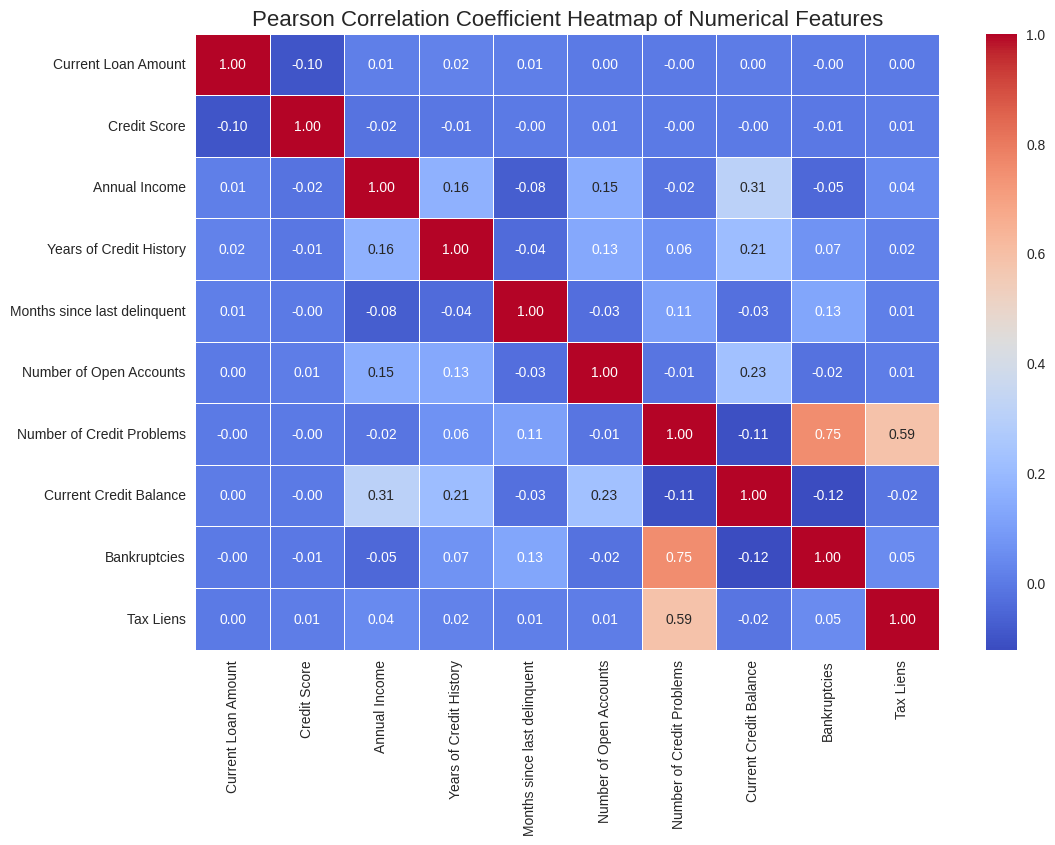

In [50]:
# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Coefficient Heatmap of Numerical Features', fontsize=16)
plt.show()